# CNN을 이용한 강아지, 고양이 분류 

In [2]:
# !unzip -uq "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs_small-20211005T081218Z-001.zip" -d "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/"

In [1]:
train_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/train"

test_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/test"

In [2]:
IM_WIDTH = 220
IM_HEIGTH = 220
BATCH_SIZE = 1

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
# 이미지 전처리
train_datagen = ImageDataGenerator(
    
    # rescale = 1/255,
    # 회전 범위
    rotation_range = 360,

    # 좌우 이동 범위
    width_shift_range = 0.5,

    # 상하 이동범위(자기 크기의 반)
    height_shift_range= 0.5,

    # 좌우반전
    horizontal_flip = True,

    # 상하 반전
    vertical_flip =True
)

In [5]:
# 이미지 로드
train_generator = train_datagen.flow_from_directory(
    
    # 경로
    train_path,

    # 이미지 크기 = (줄, 칸)
    target_size = (IM_HEIGTH,IM_WIDTH),

    # batch_size
    batch_size = BATCH_SIZE,

    # 'binary' = 이중 분류
    class_mode = 'binary',

    # 섞을거임?
    shuffle = True

)

Found 2000 images belonging to 2 classes.


In [6]:
img, label = train_generator.next()

In [7]:
# 값확인
print("최댓값 : ",np.unique(img).max())
print("최솟값 : ",np.unique(img).min())

최댓값 :  255.0
최솟값 :  0.0


([], <a list of 0 Text major ticklabel objects>)

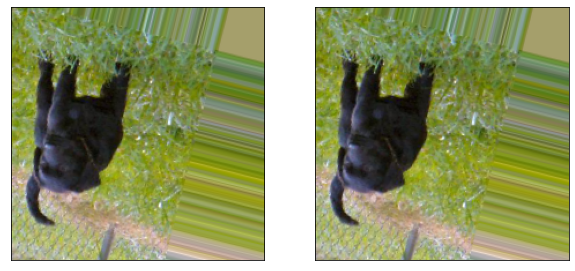

In [8]:
# 시각화 
plt.figure(figsize = (10, 10))

# 이미지를 시각화 하려면 실수형은 0~1사이 값을 가지거나 정수형은 0~255사이의 값을 가짐

# 방법1. 실수형을 0~ 1사이
plt.subplot(1, 2,1)
plt.imshow(img[0]/255)
plt.xticks([])
plt.yticks([])

# 방법2. 실수형이니까 정수형로 바꿈
plt.subplot(1, 2,2)
plt.imshow(np.array(img[0], dtype = 'int'))
plt.xticks([])
plt.yticks([])

# ImageDataGenerator에서 처음 부터 rescale= 1/255옵션 주면 편리

In [9]:
BATCH_SIZE = 16

# 이미지 전처리 ,  크기 rescale 해서 가져옴
train_datagen = ImageDataGenerator(
    
    # 이미지 값의 범위
    rescale = 1/255,
    rotation_range = 360,
    width_shift_range = 0.5,
    height_shift_range= 0.5,
    horizontal_flip = True,
    vertical_flip =True
)

# 이미지 로드
train_generator = train_datagen.flow_from_directory(
    
    train_path,
    target_size = (IM_HEIGTH,IM_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = 'binary',
    shuffle = True
)

Found 2000 images belonging to 2 classes.


In [10]:
img, label = train_generator.next()

# 0~1 사이인지 확인
print("최댓값 : ",np.unique(img).max())
print("최솟값 : ",np.unique(img).min())

최댓값 :  1.0
최솟값 :  0.0


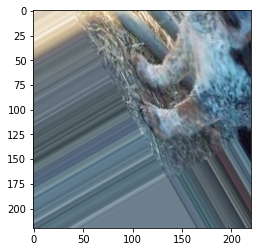

In [11]:
# 시각화
plt.imshow(img[0])

In [55]:
# 테스트셋
test_datagen = ImageDataGenerator(
    rescale = 1/255
    )
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(IM_HEIGTH, IM_WIDTH),
    batch_size = 10,
    class_mode = 'binary',
    shuffle = False
) 

Found 1000 images belonging to 2 classes.


In [33]:
# 순차모델 객체 생성
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3), 
                 input_shape=(220, 220, 3),
                 activation= 'relu',
                 padding = 'SAME'
                 )           
          )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


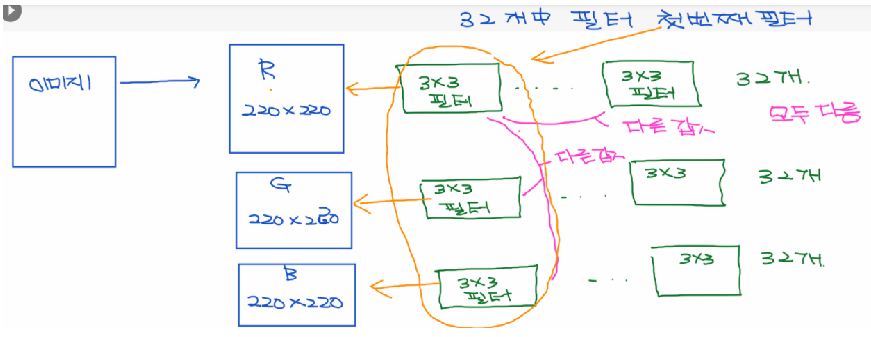

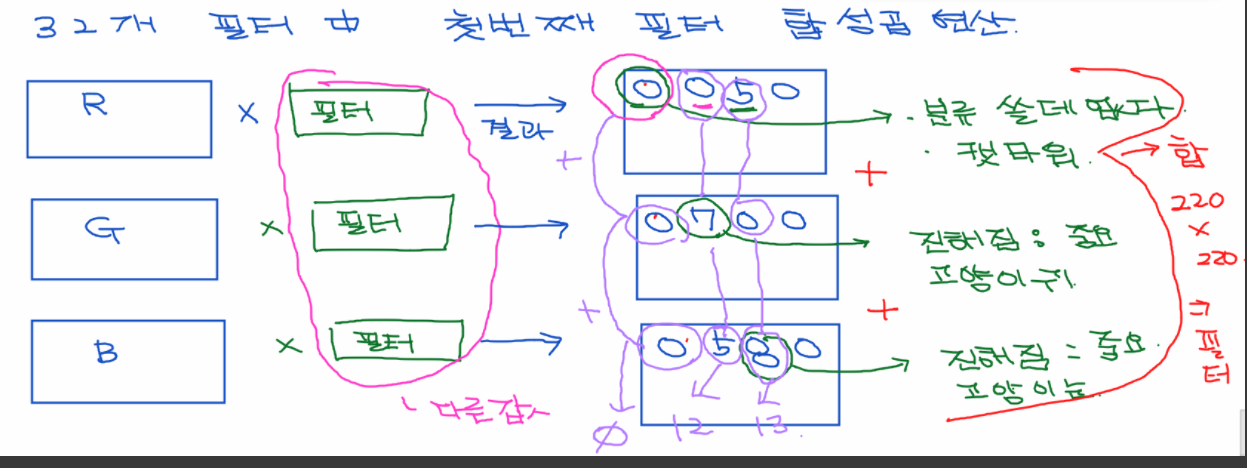

In [34]:
# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME', strides = 2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 합성곱 연산
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="SAME"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME', strides = 2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 합성곱 연산
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'SAME', activation = 'relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME', strides = 2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
Total params: 93,248
Trainable params: 93,248
Non-trainable params: 0
__________________________________________________

In [39]:
# fully_connected layer
model.add(Flatten())
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [40]:
model.add(Dense(512, activation = 'relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [41]:
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [42]:
# model.compile(loss = 'binary_crossentropy',
#               optimizer = Adam(learning_rate = 1e-5),
#               metrics = ['acc']
#               )

# model.fit(train_generator, epochs = 10)

# model.save("cats_and_dogs.h5")

Epoch 1/10
125/125 [==============================] - 465s 4s/step - loss: 0.6919 - acc: 0.5235
Epoch 2/10
125/125 [==============================] - 43s 348ms/step - loss: 0.6877 - acc: 0.5415
Epoch 3/10
125/125 [==============================] - 36s 289ms/step - loss: 0.6863 - acc: 0.5415
Epoch 4/10
125/125 [==============================] - 36s 288ms/step - loss: 0.6832 - acc: 0.5430
Epoch 5/10
125/125 [==============================] - 37s 293ms/step - loss: 0.6748 - acc: 0.5555
Epoch 6/10
125/125 [==============================] - 37s 294ms/step - loss: 0.6742 - acc: 0.5755
Epoch 7/10
125/125 [==============================] - 36s 286ms/step - loss: 0.6666 - acc: 0.5830
Epoch 8/10
125/125 [==============================] - 36s 290ms/step - loss: 0.6664 - acc: 0.5680
Epoch 9/10
125/125 [==============================] - 36s 289ms/step - loss: 0.6589 - acc: 0.5895
Epoch 10/10
125/125 [==============================] - 43s 340ms/step - loss: 0.6578 - acc: 0.5820


In [47]:
from tensorflow.keras.models import load_model

# 모델 경로
model_path = '/content/drive/MyDrive/cats_and_dogs_small_cnn.h5'

# 100epochs Sqeuential 모델 로드
model = load_model(model_path)

model.summary()

In [56]:
X_test, y_test = test_generator.next()

In [57]:
print(X_test.shape)
print(y_test.shape)

(10, 220, 220, 3)
(10,)


In [58]:
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [74]:
predict = model.predict(X_test)

predict01 = np.where(predict > 0.5, 1,0)

predict02 = predict01.flatten()

acc = sum(predict02 == y_test)/len(predict02)

print("acc:",acc)

acc: 0.7


In [76]:
total_acc=0

In [77]:
for index in range(100):
  X_test, y_test = test_generator.next()
  predict = model.predict(X_test)
  predict01 = np.where(predict > 0.5, 1, 0)
  predict02 = predict01.flatten()

  predict03 = (predict02 == y_test)

  acc = np.sum(predict03)/len(predict03)
  
  total_acc =  total_acc + acc

In [78]:
total_acc/100

0.716

In [80]:
# 외부 이미지로 테스트 해보기
from tensorflow.keras.preprocessing import image

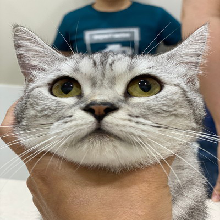

In [83]:
# 테스트 이미지 경로
cat1_path = '/content/cat1.jpg'

img = image.load_img(cat1_path, target_size = (220, 220))
img

In [88]:
img_tensor = image.img_to_array(img)
img_tensor = img_tensor/255

print(img_tensor.shape)

# 차원 변환
img_tensor = np.expand_dims(img_tensor, axis = 0)
print(img_tensor.shape)

(220, 220, 3)
(1, 220, 220, 3)


In [91]:
# 예측
model.predict(img_tensor)

array([[0.22139643]], dtype=float32)

# 실습

# .CNN을 이용한 고양이 강아지 분류 

- 587 ~ 600

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# 외부 이미지로 테스트 해보기
from tensorflow.keras.preprocessing import image

In [2]:
train_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/train"

test_path = \
     "/content/drive/MyDrive/Colab Notebooks/AI_허현준/12주차 DNN_CNN/datasets/cats_and_dogs/cats_and_dogs_small/test"

In [3]:
IM_WIDTH = 220
IM_HEIGTH = 220

In [4]:
# 이미지 전처리 ,  크기 rescale 해서 가져옴
train_datagen = ImageDataGenerator(
    
    # 이미지 값의 범위
    rescale = 1/255,
    rotation_range = 180,
    width_shift_range = 0.2,
    height_shift_range= 0.2,
    horizontal_flip = True,
    vertical_flip =True
)

# 테스트셋 이미지 로드
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (IM_HEIGTH,IM_WIDTH),
    batch_size = 16,
    class_mode = 'binary',
    shuffle = True
)

# 테스트셋
test_datagen = ImageDataGenerator(
    rescale = 1/255
    )
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(IM_HEIGTH, IM_WIDTH),
    batch_size = 10,
    class_mode = 'binary',
    shuffle = False
) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
img , label = train_generator.next()

In [10]:
# 순차모델 객체 생성
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3), 
                 input_shape=(220, 220, 3),
                 activation= 'relu',
                 padding = 'SAME'
                 )           
          )

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# 합성곱 연산
model.add(Conv2D(64, kernel_size=(3,3), activation="relu", padding="SAME"))

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# 합성곱 연산
model.add(Conv2D(128, kernel_size = (3, 3), padding = 'SAME', activation = 'relu'))

# 맥스 풀링
model.add(MaxPooling2D(pool_size = 2, padding ='SAME'))

# fully_connected layer
model.add(Flatten())

# dropout
model.add(Dropout(0.5))

# 밀집층
model.add(Dense(512, activation = 'relu'))

# dropout
model.add(Dropout(0.5))

# 한개로 회귀
model.add(Dense(1,activation = 'sigmoid'))

# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)           

In [11]:
model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(learning_rate = 1e-5),
              metrics = ['acc']
              )

model.fit(train_generator, epochs = 3)

model.save("cats_and_dogs.h5")

Epoch 1/3
125/125 [==============================] - 385s 3s/step - loss: 0.6972 - acc: 0.5090
Epoch 2/3
125/125 [==============================] - 37s 299ms/step - loss: 0.6915 - acc: 0.5360
Epoch 3/3
125/125 [==============================] - 35s 279ms/step - loss: 0.6868 - acc: 0.5430


In [12]:
# 성능 테스트

# 테스트 데이터의 정확도의 합을 저장 할 변수
total_acc = 0

for index in range(100):

  # 이미지 정보(고양이 or 강아지) -> X_test
  # 이미지 정보에 대한 정답 -> y_test
  X_test, y_test = test_generator.next()

  # 예측
  predict = model.predict(X_test)
  predict01 = np.where(predict > 0.5, 1, 0)
  predict02 = predict01.flatten()

  predict03 = (predict02 == y_test)

  acc = np.sum(predict03)/len(predict03)
  
  # 정확도를 total_acc에 추가
  total_acc =  total_acc + acc

# 정확도 평균 계산
print("정확도 평균 : ",total_acc/100)

정확도 평균 :  0.5629999999999997


In [13]:
# 모델 성능 측정

# 모델 경로
model_path = '/content/drive/MyDrive/cats_and_dogs_small_cnn.h5'

# 100epochs Sqeuential 모델 로드
model = load_model(model_path)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0

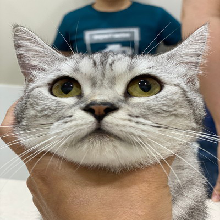

In [14]:
# 테스트 이미지 경로
cat1_path = '/content/cat1.jpg'

# 이미지 로드, 2차원 배열, 가로 세로 220으로 수정
img = image.load_img(cat1_path, target_size = (220, 220))
img

In [15]:
# 이미지를 3차원 배열로 리턴
img_tensor = image.img_to_array(img)
img_tensor = img_tensor/255
print(img_tensor.shape)


# 차원 변환
# 4차원으로 
img_tensor = np.expand_dims(img_tensor, axis = 0)
print(img_tensor.shape)

(220, 220, 3)
(1, 220, 220, 3)


In [16]:
# 예측
model.predict(img_tensor)

array([[0.22139643]], dtype=float32)